<a href="https://colab.research.google.com/github/duongtrung/Pytorch-tutorials/blob/main/16_pytorch_weights_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

This tutorial demonstrates how to create, train, and extract weights from a neural network using PyTorch. We'll start by defining a dataset, building a more complex network, training it, and finally extracting its learned weights. Additionally, we will visualize the structure of the neural network.

## Step 1: Import Libraries
We begin by importing the necessary libraries: PyTorch for building and training the neural network, and NumPy for handling the dataset.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Step 2: Define the Dataset
We define an example dataset using NumPy arrays and convert them to PyTorch tensors for training. This dataset contains some generalized data points to illustrate the process of training a neural network.

In [3]:
# Example Dataset
x = np.array([[0.1, 0.2], [0.3, 0.7], [0.5, 0.5], [0.8, 0.1], [0.9, 0.9]], dtype=np.float32)
y = np.array([[0.2], [1.0], [0.5], [0.3], [0.9]], dtype=np.float32)

# Convert to PyTorch tensors
x_tensor = torch.tensor(x)
y_tensor = torch.tensor(y)

## Step 3: Define the Neural Network
We define a neural network with two hidden layers: the first hidden layer containing three neurons and the second hidden layer containing two neurons. The `forward` method specifies how data passes through the network.

In [5]:
# Define the neural network
class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        self.hidden1 = nn.Linear(2, 3)
        self.hidden2 = nn.Linear(3, 2)
        self.output = nn.Linear(2, 1)
    
    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x

## Step 4: Instantiate the Model, Define Loss Function, and Optimizer
Next, we instantiate the model, define the loss function (`Mean Squared Error`), and choose the `Adam` optimizer to train the model.

In [7]:
# Instantiate the model, define the loss function and the optimizer
model = ComplexNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

## Step 5: Train the Neural Network
We train the network in a loop until it successfully learns the function. In each cycle, we perform a forward pass to compute predictions, calculate the loss, and then perform a backward pass to update the weights.

In [9]:
# Training loop
done = False
cycle = 1
while not done:
    print(f"Cycle #{cycle}")
    cycle += 1
    
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Check if successful
    pred = outputs.detach().numpy()
    done = np.allclose(pred, y, atol=0.1)
    print(pred)

Cycle #1
[[0.37386858]
 [0.34488046]
 [0.302     ]
 [0.23667417]
 [0.22428024]]
Cycle #2
[[0.39881706]
 [0.3761894 ]
 [0.33346063]
 [0.26805013]
 [0.25854167]]
Cycle #3
[[0.42363223]
 [0.40732104]
 [0.364752  ]
 [0.29921478]
 [0.29244405]]
Cycle #4
[[0.448124  ]
 [0.43805462]
 [0.3956597 ]
 [0.3294479 ]
 [0.32546404]]
Cycle #5
[[0.472345  ]
 [0.468458  ]
 [0.42625654]
 [0.35984096]
 [0.35865548]]
Cycle #6
[[0.4962652 ]
 [0.49683076]
 [0.4565109 ]
 [0.39017126]
 [0.3917647 ]]
Cycle #7
[[0.51980793]
 [0.5205281 ]
 [0.48606032]
 [0.42003685]
 [0.4242953 ]]
Cycle #8
[[0.5428517 ]
 [0.5437815 ]
 [0.514864  ]
 [0.44929928]
 [0.45615488]]
Cycle #9
[[0.56520987]
 [0.56641304]
 [0.5428712 ]
 [0.4777444 ]
 [0.48716033]]
Cycle #10
[[0.58661914]
 [0.58817995]
 [0.56978387]
 [0.5050647 ]
 [0.5170179 ]]
Cycle #11
[[0.606738  ]
 [0.6088191 ]
 [0.59520864]
 [0.5308616 ]
 [0.54532963]]
Cycle #12
[[0.62514126]
 [0.6278563 ]
 [0.61865497]
 [0.5546435 ]
 [0.57159233]]
Cycle #13
[[0.6413357 ]
 [0.644755  ]

## Step 6: Extract the Weights
After training, we can extract and print the weights and biases of each layer. This can help us understand what the network has learned.

In [11]:
# Extracting weights
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")

hidden1.weight: tensor([[ 0.3619,  1.7278],
        [-0.2095,  0.3914],
        [ 1.0927, -0.4267]])
hidden1.bias: tensor([-0.1637, -0.4179,  0.1873])
hidden2.weight: tensor([[-0.8040, -0.0441, -1.1734],
        [ 0.6363,  0.4071, -0.8615]])
hidden2.bias: tensor([0.7335, 0.2352])
output.weight: tensor([[-0.8343,  0.8603]])
output.bias: tensor([0.3008])


## Step 7: Visualize the Neural Network Structure
To better understand the structure of our neural network, we will visualize the connections between the input, hidden, and output layers.

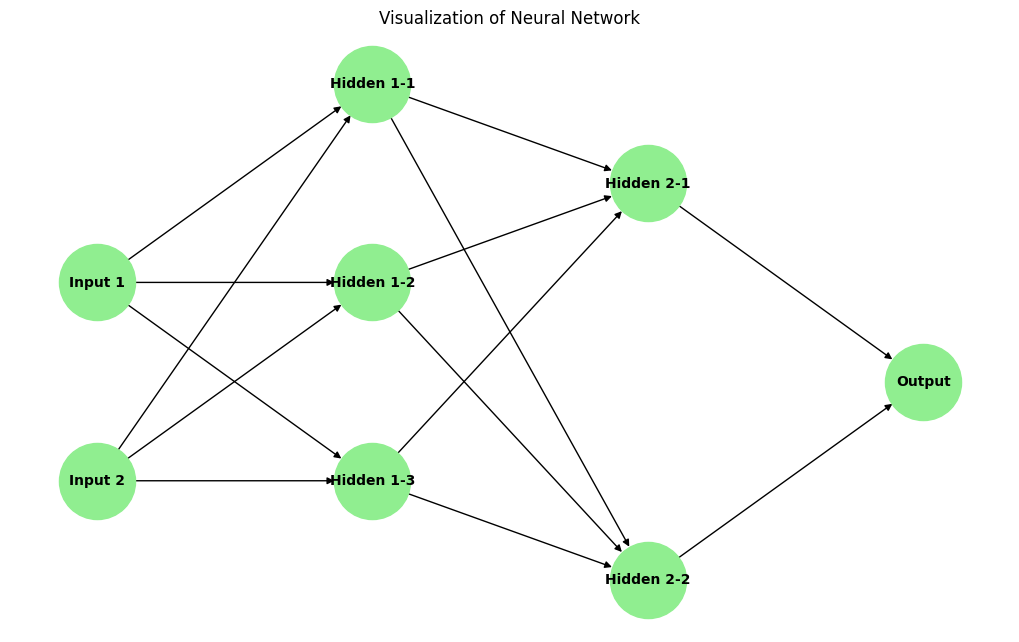

In [16]:
# Create a graph to visualize the neural network
G = nx.DiGraph()

# Define the layers and nodes
input_nodes = ['Input 1', 'Input 2']
hidden_nodes_1 = ['Hidden 1-1', 'Hidden 1-2', 'Hidden 1-3']
hidden_nodes_2 = ['Hidden 2-1', 'Hidden 2-2']
output_nodes = ['Output']

# Add nodes to the graph
G.add_nodes_from(input_nodes + hidden_nodes_1 + hidden_nodes_2 + output_nodes)

# Define edges with labels
edges = [
    ('Input 1', 'Hidden 1-1'), ('Input 1', 'Hidden 1-2'), ('Input 1', 'Hidden 1-3'),
    ('Input 2', 'Hidden 1-1'), ('Input 2', 'Hidden 1-2'), ('Input 2', 'Hidden 1-3'),
    ('Hidden 1-1', 'Hidden 2-1'), ('Hidden 1-1', 'Hidden 2-2'),
    ('Hidden 1-2', 'Hidden 2-1'), ('Hidden 1-2', 'Hidden 2-2'),
    ('Hidden 1-3', 'Hidden 2-1'), ('Hidden 1-3', 'Hidden 2-2'),
    ('Hidden 2-1', 'Output'), ('Hidden 2-2', 'Output')
]

# Add edges to the graph
G.add_edges_from(edges)

# Draw the network
plt.figure(figsize=(10, 6))
pos = {
    'Input 1': (0, 1), 'Input 2': (0, 0),
    'Hidden 1-1': (1, 2), 'Hidden 1-2': (1, 1), 'Hidden 1-3': (1, 0),
    'Hidden 2-1': (2, 1.5), 'Hidden 2-2': (2, -0.5),
    'Output': (3, 0.5)
}

# Draw nodes and edges with labels
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightgreen', font_size=10, font_weight='bold', arrows=True)
plt.title('Visualization of Neural Network')
plt.show()


## Summary
#In this tutorial, we built a more complex neural network using PyTorch. We covered defining the dataset, building the model, training it, extracting the learned weights, and visualizing the structure of the neural network. This example provides a fundamental understanding of how neural networks work in PyTorch, which can be extended to more complex tasks.
